<a href="https://colab.research.google.com/github/Bersk9/www/blob/master/Assignment_2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk import cluster
from nltk.cluster import euclidean_distance, cosine_distance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import collections
import re

In [42]:
nltk.download("stopwords")
nltk.download("wordnet")
#Dowloand the dataset
nltk.download("brown")
nltk.download("punkt")
en_stop = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
#Exploring the dataset
from nltk.corpus import brown as corpus

for n,item in enumerate(corpus.words(corpus.fileids()[0])[:300]):
    print(item, end=" ")
    if (n%25) ==24:
      print(" ")

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .  
The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise  
and thanks of the City of Atlanta '' for the manner in which the election was conducted . The September-October term jury had been charged  
by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan  
Allen Jr. . `` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in  
the election , the number of voters and the size of this city '' . The jury said it did find that many of Georgia's  
registration and election laws `` are outmoded or inadequate and often ambiguous '' . It recommended that Fulton legislators act `

Review the number of documents

In [51]:
docs=[corpus.words(fileid) for fileid in corpus.fileids()]

print(docs[:5])
print("num of docs:", len(docs))

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...], ['Austin', ',', 'Texas', '--', 'Committee', 'approval', ...], ['Several', 'defendants', 'in', 'the', 'Summerdale', ...], ['Oslo', 'The', 'most', 'positive', 'element', 'to', ...], ['East', 'Providence', 'should', 'organize', 'its', ...]]
num of docs: 500


In [52]:
import string

# English stopwords defined by the NLTK package.
en_stop = nltk.corpus.stopwords.words('english')

# Ignore noises that might affect our result.
en_stop = ["``","/",",.",".,",";","--",":",")","(",'"','&',"'",'),',',"','-','.,','.,"','.-',"?",">","<","!","#","$","%","+","=","?","@","[","]","`","''","'","-"]                  \
         +["[0-9]+"]                                                      \
         +["said","say","u","v","mln","ct","net","dlrs","tonne","pct","shr","nil","company","lt","share","year","billion","price"]          \
         +en_stop

In [138]:
### Pre-processing Method

from nltk.corpus import wordnet as wn # import for lemmatize

def preprocess_word(word, stopwordset):
    
    #1.convert words to lowercase (e.g., Python =>python)
    word=word.lower()

    pattern3 = '[0-9]+' 
    word = re.sub(pattern3, '', word)
    
    #2.remove "," and "."
    if word in [",","."]:
        return None
    
    #3.remove stopwords  (e.g., the => (None)) 
    if word in stopwordset:
        return None
    
    #4.lemmatize  (e.g., cooked=>cook)
    lemma = wn.morphy(word)
    if lemma is None:
        return word

    # lemmatized words could be in the stopwords set
    elif lemma in stopwordset: 
        return None
    else:
        return lemma


def preprocess_document(document):
    document=[preprocess_word(w, en_stop) for w in document]
    document=[w for w in document if w is not None]
    return document

def preprocess_documents(documents):
    return [preprocess_document(document) for document in documents]

In [54]:
# before
print(docs[0][:25]) 

# after
print(preprocess_documents(docs)[0][:25])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
['fulton', 'county', 'grand', 'jury', 'friday', 'investigation', "atlanta's", 'recent', 'primary', 'election', 'produce', 'evidence', 'irregularity', 'take', 'place', 'jury', 'term-end', 'presentment', 'city', 'executive', 'committee', 'over-all', 'charge', 'election', 'deserve']


In [150]:
from sklearn.decomposition import TruncatedSVD

max_k = 20
pre_docs=preprocess_documents(docs)
pre_docs=["".join(doc) for doc in pre_docs]
print(pre_docs[0])

# fit
X_orig = vectorizer.fit_transform(pre_docs).toarray()
terms = vectorizer.get_feature_names()
svd = TruncatedSVD(n_components=100, random_state = 0)
X = svd.fit_transform(X_orig)

print("Original X:", X_orig.shape)
print("New X:", X.shape)
len(X)

fultoncountygrandjuryfridayinvestigationatlanta'srecentprimaryelectionproduceevidenceirregularitytakeplacejuryterm-endpresentmentcityexecutivecommitteeover-allchargeelectiondeservepraisethankscityatlantamannerelectionconductseptember-octobertermjurychargefultonsuperiorcourtjudgedurwoodpyeinvestigatereportpossibleirregularityhard-foughtprimarymayor-nominateivanallenjr.relativehandfulreportreceivejuryconsiderwidespreadinterestelectionnumbervotersizecityjuryfindmanygeorgia'sregistrationelectionlawsoutmodeinadequateoftenambiguousrecommendfultonlegislatoractlawsstudyreviseendmodernizeimprovegrandjurycommentnumbertopicamongatlantafultoncountypurchasingdepartmentwelloperatefollowgenerallyacceptpracticeinurebestinterestgovernmentmergerproposehoweverjurybelieftwoofficecombineachievegreaterefficiencyreducecostadministrationcitypurchasingdepartmentjurylackexperienceclericalpersonnelresultcitypersonnelpolicyurgecitytakestepsremedyproblemimplementationgeorgia'sautomobiletitlelawalsorecommendoutgoju

500

In [140]:
# define the vectorizer
vectorizer = TfidfVectorizer(max_features=200, token_pattern=r'(?u)\b\w+\b' )

# fit
tf_idf = vectorizer.fit_transform(pre_docs)

In [151]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        kmeanModel = KMeans(n_clusters=k, random_state=20).fit(data)
        sse.append(KMeans(n_clusters=k, random_state=20).fit(data).inertia_)
        distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / data.shape[0]) 
        inertias.append(kmeanModel.inertia_) 
        mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / data.shape[0] 
        mapping2[k] = kmeanModel.inertia_ 
        print('Fit {} clusters'.format(k))
    
find_optimal_clusters(X_orig, max_k)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


2 : 0.7705400894851367
4 : 0.7406951675994854
6 : 0.7121623532175207
8 : 0.6893504257661157
10 : 0.6744865122333578
12 : 0.649414533024999
14 : 0.6368237620047235
16 : 0.6223779056041212
18 : 0.6099567864193953
20 : 0.599321814056585


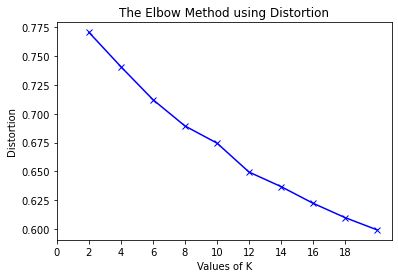

In [152]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

iters = range(2, max_k +1, 2)

plt.plot(iters, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.xticks(np.arange(0, max_k, 2))
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

2 : 351.37590351066706
4 : 330.1562627380243
6 : 310.5128227064998
8 : 294.96277126794723
10 : 285.91442747326477
12 : 269.2182668623707
14 : 260.60984954284896
16 : 251.35362550873944
18 : 243.53253549921985
20 : 236.79675220448956


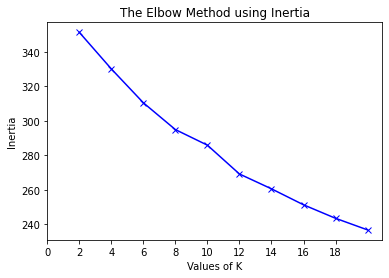

In [153]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(iters, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.xticks(np.arange(0, max_k, 2))
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [180]:
import random
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
rng = random.Random()
rng.seed(100)


def find_optimal_clusters(data, max_k):
    inner_dist = np.zeros(shape=[max_k - 1])
    iters = range(2, max_k + 1)

    for k in iters:
        kmeans = cluster.KMeansClusterer(k, euclidean_distance, avoid_empty_clusters=True, conv_test=1e-4, rng = rng)
        clusters = kmeans.cluster(data, True, trace=True) 
        print('Fit {} clusters'.format(k))
        print("Displaying results for", k, "clusters:")
        print("Item count in clusters:")
        print(Counter(clusters))
    
find_optimal_clusters(X, max_k)


k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Fit 2 clusters
Displaying results for 2 clusters:
Item count in clusters:
Counter({1: 475, 0: 25})
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Fit 3 clusters
Displaying results for 3 clusters:
Item count in clusters:
Counter({2: 401, 1: 69, 0: 30})
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Fit 4 clusters
Displaying results for 4 clusters:
Item count in clusters:
Counter({0: 483, 2: 13, 1: 2, 3: 2})
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Fit 5 clusters
Displaying results for 5 clusters:
Item count in clusters:
Counter({1: 408, 2: 37, 0: 32, 4: 19, 3: 4})
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Fit 6 clusters
Displaying results f

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
[(0, 'fig'), (0, 'k'), (0, 'miller'), (0, 'per'), (0, 'santoine'), (0, 'st'), (0, 'ten'), (0, 'wendelljr'), (0, 'williamh'), (0, 'y'), (2, 'aanti'), (2, 'at'), (2, 'b'), (2, 'banion'), (2, 'by'), (2, 'c'), (2, 'centperpoundpaymentshallpercentumdifference'), (2, 'chicagoill'), (2, 'compare'), (2, 'conant'), (2, 'corpuscular'), (2, 'coupleddouble'), (2, 'coward'), (2, 'de'), (2, 'dec'), (2, 'degrees'), (2, 'dia'), (2, 'dr'), (2, 'flexiblemillionlb'), (2, 'frankc'), (2, 'g'), (2, 'gen'), (2, 'geraghty'), (2, 'go'), (2, 'gov'), (2, 'half'), (2, 'hammarskjold'), (2, 'high'), (2, 'his'), (2, 'hp'), (2, 'hr'), (2, 'hundred'), (2, 'i'), (2, 'inch'), (2, 'it'), (2, 'jensen'), (2, 'john'), (2, 'khrushchev'), (2, 'kirby'), (2, 'l'), (2, 'lawdaughtermr'), (2, 'louisu'), (2, 'lovecan'), (2, 'm'), (2, 'maximumamountpaymentmaymakeaccount

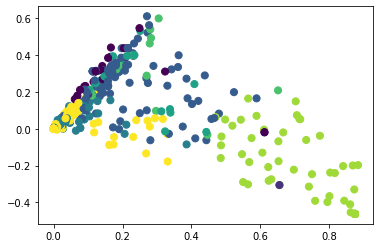

In [190]:
# K-means setting
num_clusters = 8
kmeans = cluster.KMeansClusterer(num_clusters, euclidean_distance, avoid_empty_clusters=True, conv_test=1e-4, rng = rng.seed(100))
clusters = kmeans.cluster(X, True, trace=True) 

set_data = zip(clusters, terms)  
final_list = sorted(set_data, key=lambda tup: tup[0])
print(final_list)

plt.scatter(X[:, 0], X[:, 1], c=clusters,
            s=50, cmap='viridis');